### Análise Estatística Preliminar

#### Dataset:

Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

Fonte dos dados: https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### Observação:
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns

In [65]:
# Importando a base de dados:

dados = pd.read_csv('data/dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


***

#### PARTE I:

* Análise exploratória dos dados:

> Panorama geral sobre as idades dos entrevistados;

> Distribuição de frequência: Relação % entre homens x mulheres chefes de família;

> Distribuição de frequência: Relação % sexo x cor;

> Renda média familiar por gênero e cor.

***

In [66]:
# Explorando os dados referentes às idades dos entrevistados:

min = dados['Idade'].min()
max = dados['Idade'].max()

print(f'As idades dos entrevistados variam entre {min} e {max} anos.')

As idades dos entrevistados variam entre 13 e 99 anos.


In [67]:
# Frequência:

frequencia = dados['Sexo'].value_counts()
frequencia

0    53250
1    23590
Name: Sexo, dtype: int64

In [68]:
# Percentual entre homens e mulheres que responderam à pesquisa (chefes de família):

percentual = dados['Sexo'].value_counts(normalize = True)*100

In [69]:
# Distribuição de Frequência:

dist_freq_qualitativa = pd.DataFrame({'Frequência': frequencia, 'Porcentagem': percentual})
dist_freq_qualitativa

,Frequência,Porcentagem
0,53250,69.299844
1,23590,30.700156


In [70]:
# Formatando os índices:

dist_freq_qualitativa.rename(index = {0:'Masculino', 1:'Feminino'}, inplace = True)
dist_freq_qualitativa

,Frequência,Porcentagem
Masculino,53250,69.299844
Feminino,23590,30.700156


In [71]:
# Rótulo do índice:

dist_freq_qualitativa.rename_axis('Sexo', axis = 'columns', inplace = True)
dist_freq_qualitativa

Sexo,Frequência,Porcentagem
Masculino,53250,69.299844
Feminino,23590,30.700156


#### Na tabela acima, verifica-se que, dentre os chefes de família que responderam ao questionário, 69.29% são homens e 30.70% são mulheres.

In [72]:
# Frequência com parâmetros 'Sexo' e 'Cor': Crosstab

freq_cor_sexo = pd.crosstab(dados['Sexo'], dados['Cor'])
freq_cor_sexo

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [73]:
# Formatando:

cor = {0: 'Indígena',
       2: 'Branca',
       4: 'Preta',
       6: 'Amarela',
       8: 'Parda',
       9: 'Sem declaração'}

sexo = { 0: 'Masculino', 1: 'Feminino'}

In [74]:
freq_cor_sexo.rename(index = sexo, columns = cor, inplace = True)
freq_cor_sexo

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [75]:
# Em percentual:

freq_cor_sexo_per= pd.crosstab(dados['Sexo'], dados['Cor'], normalize = True)*100
freq_cor_sexo_per.rename(index = sexo, columns = cor, inplace = True)
freq_cor_sexo_per

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


#### Na tabela acima, verifica-se: 32.61% dos chefes de família são homens e pardos (maioria) e 0.13% dos chefes de família são mulheres indígenas (minoria).

In [76]:
# Agregando a renda familiar:

renda_media = pd.crosstab(dados['Sexo'], dados['Cor'], aggfunc = 'mean', values = dados['Renda'])
renda_media.rename(index = sexo, columns = cor, inplace = True)
renda_media

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


#### Verificam-se:

> A maior média de renda pertence a indivíduos do sexo masculino e cor amarela;

> A menor média de renda pertence a indivíduos indígenas do sexo masculino.

***

#### PARTE II:

* Distribuição de frequências de variaveis quantitativas:

> Categorização da variável 'Renda"

> Distribuição de frequências

***

##### Sabe-se que a população brasileira pode ser dividida entre as seguintes classes, levando-se em consideração sua renda mensal:

* CLASSE A: Quem ganha mais de 20 salários mínimos.
* CLASSE B: Quem ganha entre 10 e 20 salários mínimos.
* CLASSE C: Quem ganha entre 4 e 10 salários mínimos.
* CLASSE D: QUem ganha de 2 a 4 salários mínimos.
* CLASSE E: Quem ganha menos de 2 salários mínimos.

##### O dataset em questão leva em consideração dados de 2015, quando o salário mínimo no Brasil era de 788 reais. Convertendo em reais os parâmetros acima, teremos:

* CLASSE A: Acima de 15.760 reais.
* CLASSE B: Entre 7.880 e 15.760 reais.
* CLASSE C: Entre 3.152 e 7.880 reais.
* CLASSE D: Entre 1.576 e 3.152 reais.
* CLASSE E: Até 1.576 reais.

In [77]:
# Identificando, dentre os valores para renda informados no dataset, qual é o menor deles:

dados['Renda'].min()

0

In [78]:
# Identificando, dentre os valores para renda informados no dataset, qual é o maior deles:

dados['Renda'].max()

200000

In [79]:
# Criando as classes (valores limites) e seus rótulos:

classes = [0,1576,3152,7880,15760,200000]
labels = ['E', 'D', 'C', 'B', 'A']

In [80]:
# Categorizando a variável 'Renda':

pd.cut(x = dados['Renda'],
       bins = classes,
       labels = labels,
       include_lowest = True)

0        E
1        E
2        E
3        C
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [81]:
# Contando quantos registros tem cada categoria (frequência):

frequencia = pd.value_counts(pd.cut(x = dados['Renda'],
                                    bins = classes,
                                    labels = labels,
                                    include_lowest = True))

frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [82]:
# Em porcentagem:

percentual = pd.value_counts(pd.cut(x = dados['Renda'],
                                    bins = classes,
                                    labels = labels,
                                    include_lowest = True), normalize = True)*100
percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

In [83]:
dist_freq_quantitativa = pd.DataFrame({'Frequência': frequencia, 'Porcentagem': percentual})
dist_freq_quantitativa

,Frequência,Porcentagem
E,49755,64.751432
D,16700,21.733472
C,7599,9.889381
B,2178,2.834461
A,608,0.791255


In [84]:
# Organizando os índices:

dist_freq_quantitativa.sort_index(ascending = False, inplace = True)
dist_freq_quantitativa

,Frequência,Porcentagem
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


***

#### PARTE III:

* Variáveis Quantitativas de amplitude fixa:

> Estabelecimento do número de classes/categorias que preciso criar num dataframe de n registros: Regra de Sturges.

    * Passo 1: Saber quantos registros (n) meu dataset possui.
    
    * Passo 2: Aplicar a fóruma de Sturges. ( k = 1 + (10/3)log(n) )
    
* Criação de DataFrame de distribuição de frequência da variável renda dividida em k classes.

***

In [85]:
# Descobrindo o valor de n (n° de registros):

n = dados.shape[0]
n

76840

In [86]:
# Aplicando a fórmula de Sturges para obter K (n° de classes que preciso criar):

k = 1 + (10/3) * np.log10(n)
k

17.285291187298853

##### Serão necessárias 17 classes neste dataset de 76840 registros.

In [90]:
# Arredondando o n° de classes:

k = int(k.round(0))
k

17

In [91]:
# Encontrando o valor da frequência em cada classe:

frequencia = pd.value_counts(pd.cut(x = dados['Renda'],
                                    bins = 17,
                                    include_lowest = True),
                             sort = False)
frequencia

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [92]:
# Encontrado o percentual equivalente:

percentual = pd.value_counts(pd.cut(x = dados['Renda'],
                                    bins = 17,
                                    include_lowest = True),
                            normalize = True,
                            sort = False)*100
percentual

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: Renda, dtype: float64

#### Nota-se que 98.38% dos indivíduos que responderam à pesquisa possuem renda de até 11.764,71 reais.

In [93]:
# Distribuição de frequêncis da variável renda dividida em 17 classes:

dist_freq_quantitativa_amplitude_fixa = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_quantitativa_amplitude_fixa

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


***

#### PARTE IV:

* Criação de um Histograma
    > Configuração do gráfico

***

<AxesSubplot:title={'center':'Distribuição de Frequências - Altura'}, xlabel='Metros', ylabel='Count'>

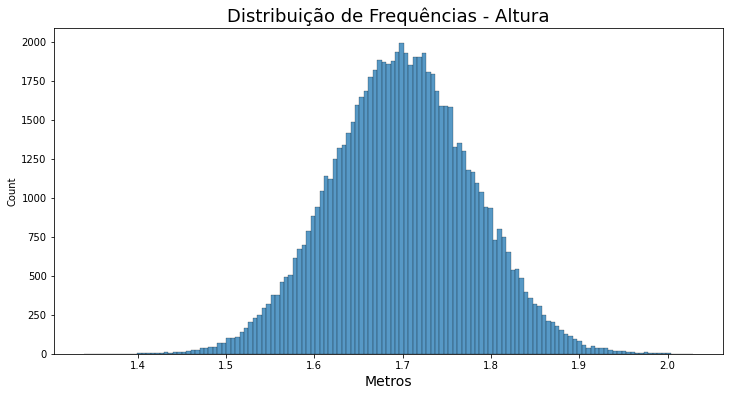

In [95]:
# Criação do histograma:

ax = sns.histplot(dados['Altura'], kde = False)

# Configuração do gráfico:

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

In [ ]:
# Plotando a distribuição de frequência "dist_freq_quantitativa":
# Parâmetro alpha: transparência

dist_freq_quantitativa['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.5, figsize = (12,6))